In [1]:
#Import the libraries

import pandas as pd
import numpy as np

In [2]:
#Import the dataset

df=pd.read_csv('insu_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
X=df.drop(df['Response']) # Droping labelled col from dataframe
Y=df['Response']      # Assigning that labelled col to output

In [5]:
df['Gender']=df['Gender'].apply(lambda X: 1 if X=='Female' else 0)  # Encoding Gender col from dataframe

In [6]:
df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda X: 1 if X=='Yes' else 0) # Encoding Vehicle Damager col 

In [7]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [8]:
vehicle_age={'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}  # creating dic based on vehicle age

In [9]:
df['Vehicle_Age']=df['Vehicle_Age'].map(vehicle_age) # Mapping the above mentioned key and value to dataframe

In [10]:
X=df.drop('Response',axis=1)
Y=df['Response']
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,0,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,0,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,1,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [11]:
# Split the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=12)

In [13]:
# Creating ML model

from sklearn.tree import DecisionTreeClassifier

In [14]:
model=DecisionTreeClassifier()   # creating object from class

In [15]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_test,Y_test)   # finding accuracy before applying PCA

0.8224790742830154

In [18]:
from sklearn.preprocessing import StandardScaler        # importing StandardScaler
sc2 = StandardScaler()                                  # creating object from class
X_train = sc2.fit_transform(X_train)                    # calculating the mean and variance
X_test = sc2.transform(X_test)

In [19]:
#Apply PCA

from sklearn.decomposition import PCA            # importing PCA
pca2 = PCA(n_components = 2)                     # Assigning parameters to the model 
X_train = pca2.fit_transform(X_train)
X_test = pca2.transform(X_test)
explained_variance = pca2.explained_variance_ratio_             # returns vector variance

In [20]:
cum_var = np.cumsum(explained_variance)
cum_var

array([0.25960569, 0.38108767])

In [22]:
from sklearn.tree import DecisionTreeClassifier                 # creating model after applying PCA
classifier = DecisionTreeClassifier(random_state = 12)           # creating object from class
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=12)

In [23]:
# Predict the Test set results

y_pred1 = classifier.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
classifier.score(X_test,Y_test)                           # Checking accuracy after applying PCA

0.8202028285796752

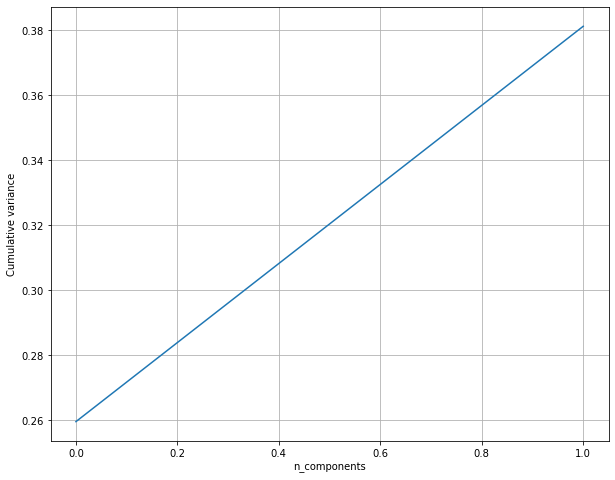

In [25]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,8))
plt.clf()
plt.plot(cum_var, linewidth = 1.5)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative variance')
plt.show()